# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.139666e+01     6.967969e+00
 * time: 0.004534006118774414
     1     3.067931e+01     5.582213e+00
 * time: 0.01333308219909668
     2     1.708267e+01     3.202166e+00
 * time: 0.038305044174194336
     3     1.334713e+01     1.586007e+00
 * time: 0.05907702445983887
     4     1.188198e+01     1.104658e+00
 * time: 0.07941699028015137
     5     1.108691e+01     1.166144e+00
 * time: 0.09481692314147949
     6     1.078588e+01     1.847011e+00
 * time: 0.11031103134155273
     7     1.009989e+01     9.255115e-01
 * time: 0.12574315071105957
     8     9.477085e+00     9.277923e-01
 * time: 0.1410839557647705
     9     9.129508e+00     5.707109e-01
 * time: 0.15628910064697266
    10     9.078582e+00     1.135688e+00
 * time: 0.1678171157836914
    11     8.981742e+00     1.020036e+00
 * time: 0.183135986328125
    12     8.877338e+00     7.640496e-01
 * time: 0.19873595237731934
    13     8.865306e+00     1.017200e+00
 * time: 0

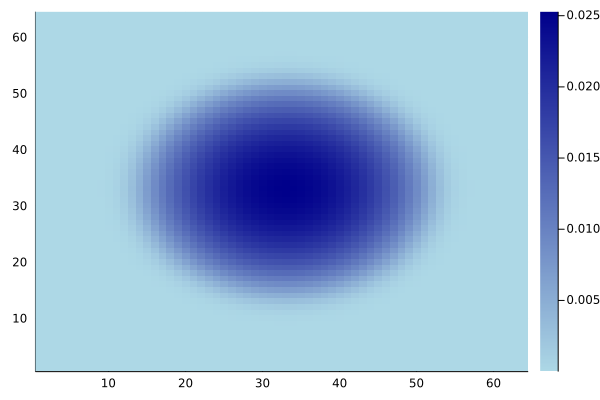

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)